In [2]:
import pickle
import os
import torch
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
def loadData(path):
    df_loaded = []
    with open(path, 'rb') as handle:
        df_loaded = pickle.load(handle)
        return df_loaded
    
    
class CustomDataset(Dataset):
    def __init__(self, path):
        self.data = loadData(path)
        self.labels = loadData(path.replace('X', 'y'))
                
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        x = self.data[index]
        x = np.array([x[0:60], x[60:120], x[120:180], x[180:240], x[240:300], x[300:360]], dtype= np.float32)
        x = torch.FloatTensor(np.transpose(x))
        y = torch.FloatTensor(self.labels[index])
        return x, y

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
td = [turn_length for video in turn_duration for turn_length in video]
td = np.array(td)
mean_length = td.mean()
std = td.std()
iqr = np.percentile(td, [90, 5])
td = td[td<iqr[0]]
td = td[td>iqr[1]]
iqr

NameError: name 'turn_duration' is not defined

In [ ]:
data = pd.read_pickle('./win0.5_f2.0.pth.tar', compression=None)

In [ ]:
data.head()

,index,gaze,pose,cr,fr
0,4,"[[[0.6056140543562385, -0.15805133491031323], ...","[[[[0.77101361 2.05061271], [0.73730188 2.0294...","[1, 0, 0, 0, 0, 1, 0, 1, 0]","[1, 0, 0, 0, 0, 1, 0, 1, 0]"
1,9,"[[[0.328225275534898, -0.35643774279266927], [...","[[[[0.768692 2.020034], [0.73511045 1.99607971...","[1, 0, 0, 0, 0, 1, 0, 1, 0]","[1, 0, 0, 0, 0, 1, 0, 1, 0]"
2,14,"[[[0.5402405248833893, -0.03183441672016884], ...","[[[[0.76795762 2.04333677], [0.7354458 2.01895...","[1, 0, 0, 0, 0, 1, 0, 1, 0]","[0, 1, 0, 0, 0, 1, 1, 0, 0]"
3,15,"[[[0.5823174590812095, -0.08234614176708113], ...","[[[[0.76777605 2.04619602], [0.73425217 2.0245...","[0, 1, 0, 0, 0, 1, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 0, 1, 0]"
4,25,"[[[-0.18097273146612206, -0.35853247238591573]...","[[[[0.7730337 2.04144635], [0.74366242 2.0297...","[0, 1, 0, 0, 0, 1, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 0, 1, 0]"


In [ ]:
data.iloc[0]['gaze'].shape, data.iloc[0]['pose'].shape, data.iloc[0]['cr'].shape, data.iloc[0]['fr'].shape

((3, 15, 2), (3, 15, 33, 2), (9,), (9,))

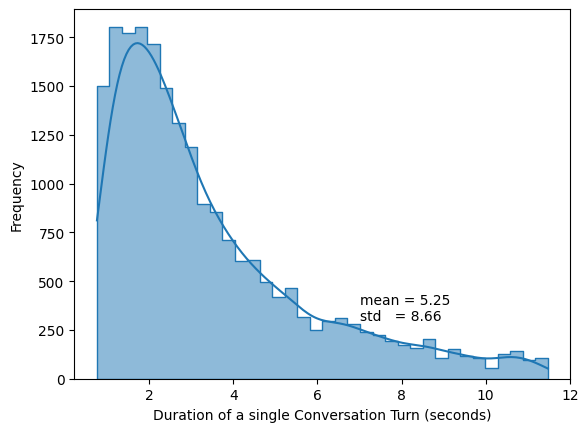

In [ ]:
sns.histplot(td, kde=True, element="step", stat="frequency")
plt.ylabel("Frequency")
plt.xlabel("Duration of a single Conversation Turn (seconds)")
plt.text(7, 300, f"mean = {mean_length:.2f}\nstd   = {std:.2f}")
plt.savefig('./Figures/turn_length_dist.png')

(1.0, 0.25)
Train Size: (17748, 180) Test Size: (8571, 180)
(1.0, 0.5)
Train Size: (17268, 180) Test Size: (8334, 180)
(1.0, 0.75)
Train Size: (16668, 180) Test Size: (8070, 180)
(1.0, 1.0)
Train Size: (16158, 180) Test Size: (7833, 180)


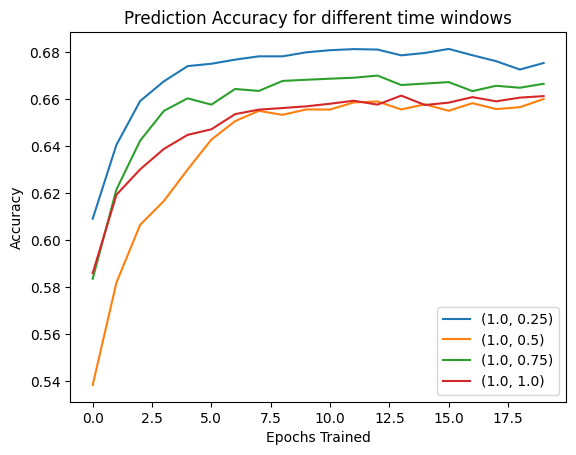

In [ ]:
acc= loadData('./Prediction_Results.tar')
for len in acc.keys():
    plt.plot([x+0.04 for x in acc[len]['acc']])
    print(len)
    print('Train Size:' ,acc[len]['train_size'], 'Test Size:', acc[len]['test_size'])
plt.legend(acc.keys())


plt.xlabel('Epochs Trained')
plt.ylabel("Accuracy")
plt.title('Prediction Accuracy for different time windows')
plt.savefig('./Figures/Accuracy_Prediction.png')


(2.0, 0.25)
Train Size: (7356, 360) Test Size: (3621, 360)
(2.0, 0.5)
Train Size: (7323, 360) Test Size: (3603, 360)
(2.0, 0.75)
Train Size: (7002, 360) Test Size: (3477, 360)
(2.0, 1.0)
Train Size: (6777, 360) Test Size: (3372, 360)


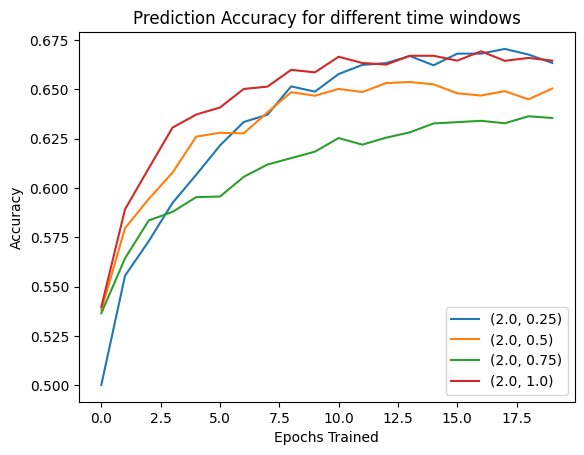

In [ ]:
acc= loadData('./Predictionv2_Results.tar')
for len in acc.keys():
    plt.plot([x+0.04 for x in acc[len]['acc']])
    print(len)
    print('Train Size:' ,acc[len]['train_size'], 'Test Size:', acc[len]['test_size'])
plt.legend(acc.keys())


plt.xlabel('Epochs Trained')
plt.ylabel("Accuracy")
plt.title('Prediction Accuracy for different time windows')
plt.savefig('./Figures/Accuracy_Prediction.png')


0.5
Train Size: (91578, 90) Test Size: (47007, 90)
1.0
Train Size: (43407, 180) Test Size: (22356, 180)
1.5
Train Size: (27393, 270) Test Size: (14145, 270)
2.0
Train Size: (19311, 360) Test Size: (10035, 360)


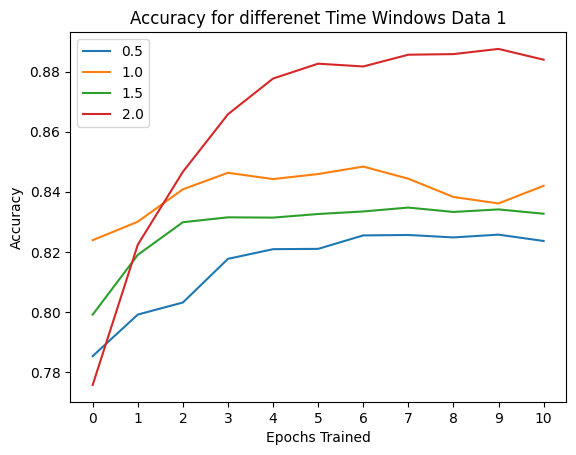

In [ ]:
acc= loadData('./Detection_Results_Continuous.tar')
for len in acc.keys():
    plt.plot([x+0.05 for x in acc[len]['acc']])
    print(len)
    print('Train Size:' ,acc[len]['train_size'], 'Test Size:', acc[len]['test_size'])
plt.legend(acc.keys())
plt.xlabel('Epochs Trained')
plt.xticks(range(11))
plt.title("Accuracy for differenet Time Windows Data 1")
plt.ylabel("Accuracy")
plt.savefig('./Figures/Accuracy_Detection_Continuous_Sampling.png')


0.5
Train Size: (14292, 90) Test Size: (6828, 90)
1.0
Train Size: (13362, 180) Test Size: (6426, 180)
1.5
Train Size: (12543, 270) Test Size: (6030, 270)
2.0
Train Size: (11676, 360) Test Size: (5607, 360)


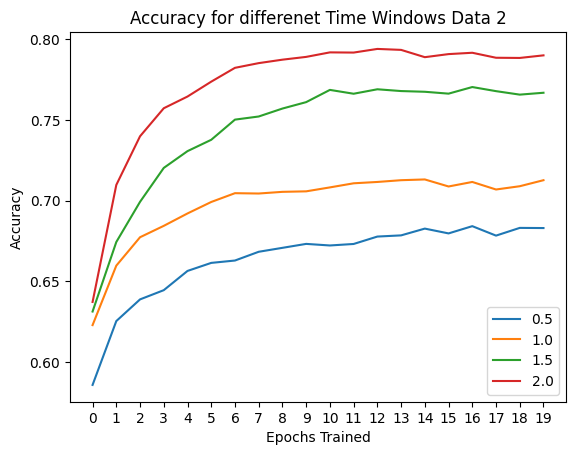

In [ ]:
acc= loadData('./Detection_Results_Discrete.tar')
for len in acc.keys():
    
    plt.plot([x+0.08 for x in acc[len]['acc']])
    print(len)
    print('Train Size:' ,acc[len]['train_size'], 'Test Size:', acc[len]['test_size'])
plt.legend(acc.keys())
plt.xticks(range(20))
plt.xlabel('Epochs Trained')
plt.ylabel("Accuracy")
plt.title("Accuracy for differenet Time Windows Data 2")
plt.savefig('./Figures/Accuracy_Detection_Discrete_Sampling.png')

In [ ]:
acc[1].keys()

dict_keys(['train_size', 'test_size', 'acc'])

In [ ]:
data = loadData('./df_updated.pth.tar')

In [ ]:
data[0]

,index,ti,tf,c01_role,c02_role,c03_role,text_1,text_2,text_3,gaze1,gaze2,gaze3,file
0,0,0.0000,42.6019,SL,ML,MS,<笑>う：んう：ん,うんうんはいあ：なるほどはいはいふんふんふんうんうんうんですよね：？うんうんうんふんふんふん...,ここで：こまかく：その：百人にあった人全員から電話番号を聞かれる事とかまでを目標：にするのか...,X Y Z\n-0.966222 0.18...,X Y Z\n-0.885523 0.14...,X Y Z\n-0.988898 0.03...,20170804165000_000
1,1,42.6019,44.2444,SL,MS,ML,0,0,う：んう：ん(なん)<止>,X Y Z\n 0.576783 -0.06...,X Y Z\n-0.529464 -0.11...,X Y Z\n0.352947 -0.6241...,20170804165000_000
2,2,44.2444,45.3179,SL,MS3,SP2,<笑>,言いますもんね今で(ない)<止>,(できな)<止>いや,X Y Z\n 0.597537 -0.03...,X Y Z\n-0.498223 0.02...,X Y Z\n0.554039 -0.1000...,20170804165000_000
3,3,45.3179,46.8162,AL,MS,AL,0,(今すら)<止>今ですらないのに(みたいな)<笑>,いや違う違う,X Y Z\n-0.084541 -0.11...,X Y Z\n-0.516585 -0.07...,X Y Z\n0.611935 -0.6915...,20170804165000_000
4,4,46.8162,50.6174,SL,ML,MS,0,はいはいう：ん,たぶんね彼女に求める：レベルがきつくなると思う,X Y Z\n 0.474957 -0.32...,X Y Z\n 0.269924 -0.20...,X Y Z\n0.266528 -0.3245...,20170804165000_000


In [ ]:
import pickle


In [23]:
data = []
with open('./Building Dataset/raw_data.pth.tar', 'rb') as handle:
    data = pickle.load(handle)
handle.close()

UnpicklingError: pickle data was truncated

In [14]:
data['20170720']['gaze']['video1'][''].shape

(1800, 3)

In [24]:
import pandas as pd
import os, glob
import numpy as np
import csv
import re
from tqdm import tqdm
import pickle

def fix_gaze_str(x:str):
    x = re.sub(' +', ' ',x)
    x = x.strip().strip('[').strip(']').strip()
    return x

def getGazeData(gaze_path):
    gaze_data = {'video1':{}, 'video2':{}, 'video3':{}}
    #print("Computing Gaze")
    for person in gaze_data.keys():
        path = gaze_path + person
        #print(path)
        gaze_files = glob.glob(path + '/*.csv')
        #print(gaze_files)
        #print('__________________________________________________________________________________________________________')
        for file_path in gaze_files:
            file_name = file_path.split('\\')[-1].split('.')[0] 
            df = pd.read_csv(file_path)
            #print('*', file_name, 'gaze')
            #print(person, file_name, df['Gaze'].apply(fix_gaze_str).str.split(' ', expand=True).astype(np.float32).to_numpy().shape)
            gaze_data[person][file_name] = df['Gaze'].apply(fix_gaze_str).str.split(' ', expand=True).astype(np.float32).to_numpy()
    return gaze_data


def getPoseData(pose_path:str):
    pose_data = {'video1':{}, 'video2':{}, 'video3':{}} 
    for person in pose_data.keys():
        path = pose_path + person
        pose_files = glob.glob(path + '/*.npy')
        for file_path in pose_files:
            file_name = file_path.split('\\')[-1].split('.')[0]  #check if same for linux
            #print('*',file_name, 'pose')
            pose_data[person][file_name] = np.load(file_path)
    return pose_data



def readData(base_path:str):
    sessions = [base_path + folder + '/' for folder in  os.listdir(base_path)]
    data = {}
    for session in tqdm(sessions):
        session_key = session.split('/')[-2]
        data[session_key] = {'gaze': {}, 'pose':{}}
        pose_data_path = session + 'Pose/'
        data[session_key]['pose'] =  getPoseData(pose_data_path)
        data[session_key]['gaze'] =  getGazeData(session)
    return data

In [25]:
path = '/home/ird/Desktop/eyegaze/Building Dataset/data/'
dataRaw = readData(path)

100%|██████████| 21/21 [01:10<00:00,  3.36s/it]


In [26]:
with open('/home/ird/Desktop/eyegaze/Building Dataset/raw_data.pth.tar', 'wb') as handle:
    pickle.dump(dataRaw, handle)

: 